In [176]:
import pandas as pd
import numpy as np
import matplotlib. pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import Binarizer
from sklearn.preprocessing import LabelBinarizer



pd.set_option("display.precision", 2)

input_table = '../../Data/Processed/airbnb/airbnb.parquet'

test_var = 'price'

classifier_variables = ['price', 'reviews_per_month']
target_variable = ['room_type']


analysis_variables = ['latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 
                      'reviews_per_month', 'calculated_host_listings_count','availability_365']

# Load Data 

In [177]:
data = pd.read_parquet(input_table)
print('data shape:', data.shape)
print('data columns:', data.columns.tolist())
data.head()

data shape: (5666, 16)
data columns: ['id', 'name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,12937,"1 Stop fr. Manhattan! Private Suite,Landmark B...",50124,Orestes,Queens,Long Island City,40.75,-73.95,Private room,130.0,3.0,248.0,2019-07-01,2.25,1.0,215.0
1,18198,Little King of Queens,70091,Justin,Queens,Woodside,40.75,-73.90,Private room,70.0,30.0,25.0,2019-05-31,0.22,1.0,324.0
2,32363,Fully Furnished Basement Apartment,140025,Fredah,Queens,Flushing,40.74,-73.83,Private room,140.0,2.0,1.0,2011-09-19,0.01,1.0,1.0
3,39593,"A room w/ a Manhattan view, longer stay",110506,Myung,Queens,Sunnyside,40.75,-73.92,Private room,79.0,30.0,28.0,2019-04-12,0.26,1.0,126.0
4,45910,Beautiful Queens Brownstone! - 5BR,204539,Mark,Queens,Ridgewood,40.70,-73.90,Entire home/apt,350.0,8.0,10.0,2019-05-12,0.11,5.0,365.0


# Data Description 

In [178]:
data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,5.67e+03,5.67e+03,5666.00,5666.00,5666.00,5666.00,5666.00,5666.00,5666.00,5666.00
mean,2.18e+07,9.62e+07,40.73,-73.87,99.52,5.18,27.70,1.57,4.06,144.45
std,1.04e+07,8.42e+07,0.04,0.06,167.10,15.03,51.96,2.13,12.45,135.54
min,1.29e+04,3.21e+03,40.57,-73.96,10.00,1.00,0.00,0.00,1.00,0.00
25%,1.40e+07,2.12e+07,40.71,-73.92,50.00,1.00,1.00,0.08,1.00,2.00
50%,2.26e+07,6.83e+07,40.74,-73.90,75.00,2.00,7.00,0.76,1.00,98.00
75%,3.08e+07,1.58e+08,40.76,-73.83,110.00,3.00,32.00,2.31,3.00,286.00
max,3.65e+07,2.74e+08,40.80,-73.71,10000.00,500.00,629.00,20.94,103.00,365.00


In [165]:
# Removing outliers

In [179]:
data = data[data['price'] < 1200]

In [180]:
data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,5.66e+03,5.66e+03,5656.00,5656.00,5656.00,5656.00,5656.00,5656.00,5656.00,5656.00
mean,2.18e+07,9.62e+07,40.73,-73.87,95.01,5.04,27.75,1.57,4.06,144.30
std,1.04e+07,8.43e+07,0.04,0.06,74.53,13.37,51.99,2.13,12.46,135.47
min,1.29e+04,3.21e+03,40.57,-73.96,10.00,1.00,0.00,0.00,1.00,0.00
25%,1.40e+07,2.12e+07,40.71,-73.92,50.00,1.00,1.00,0.09,1.00,2.00
50%,2.26e+07,6.83e+07,40.74,-73.90,75.00,2.00,7.00,0.76,1.00,97.00
75%,3.08e+07,1.58e+08,40.76,-73.83,110.00,3.00,32.00,2.31,3.00,286.00
max,3.65e+07,2.74e+08,40.80,-73.71,1000.00,500.00,629.00,20.94,103.00,365.00


# Variable Distribution

In [299]:
#num_variables = ['latitude', 'longitude', 'price','minimum_nights','number_of_reviews','reviews_per_month',
                # 'calculated_host_listings_count','availability_365']

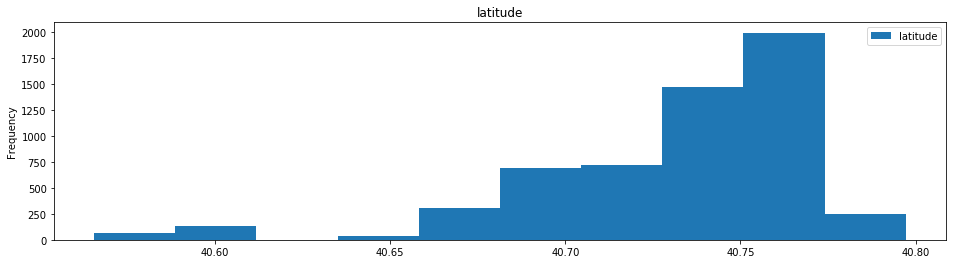

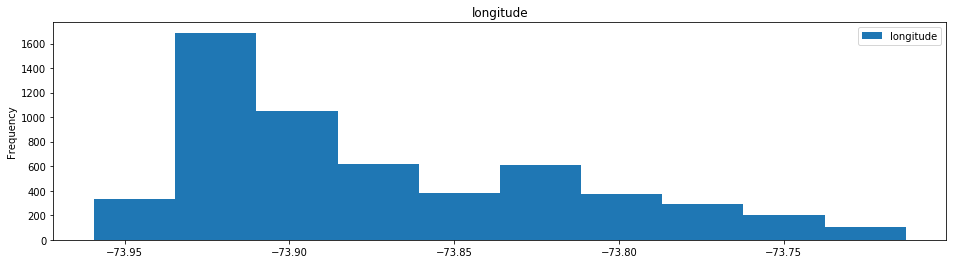

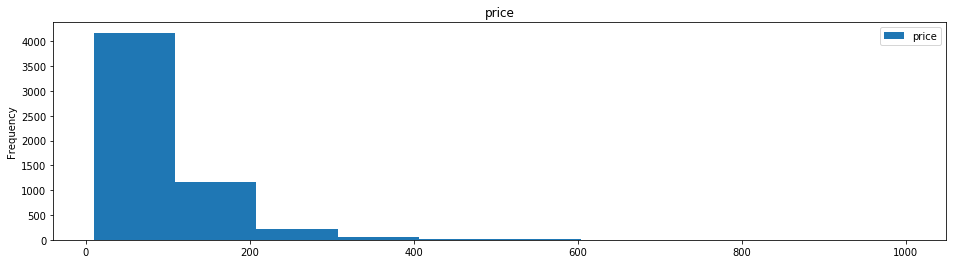

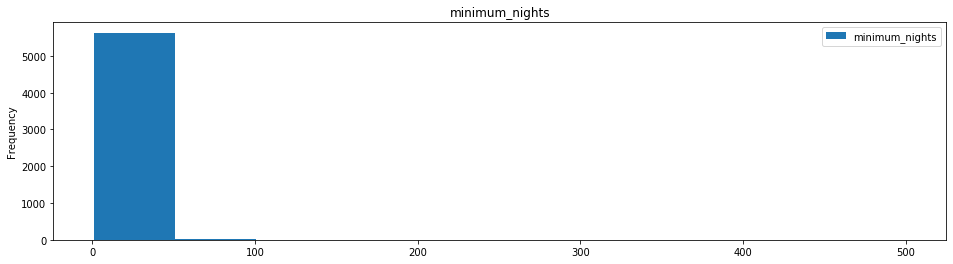

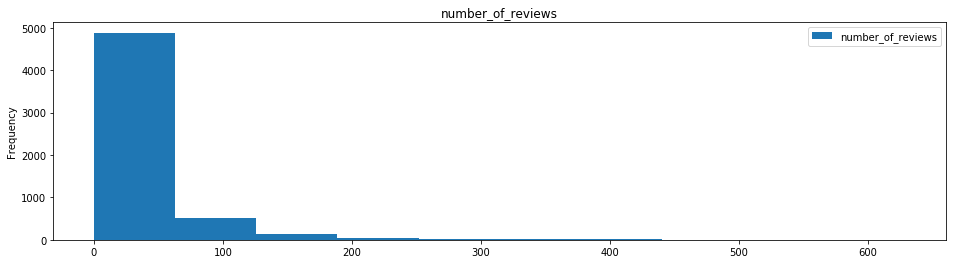

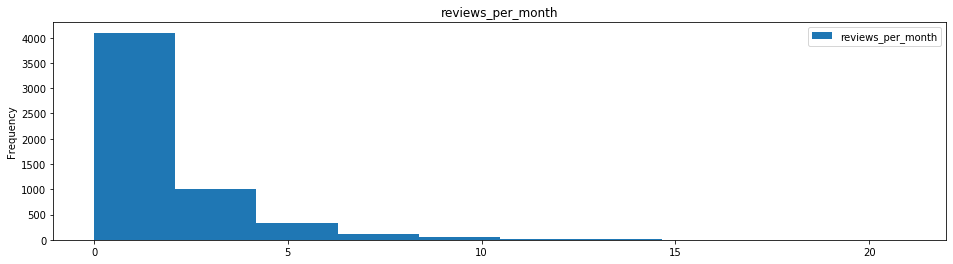

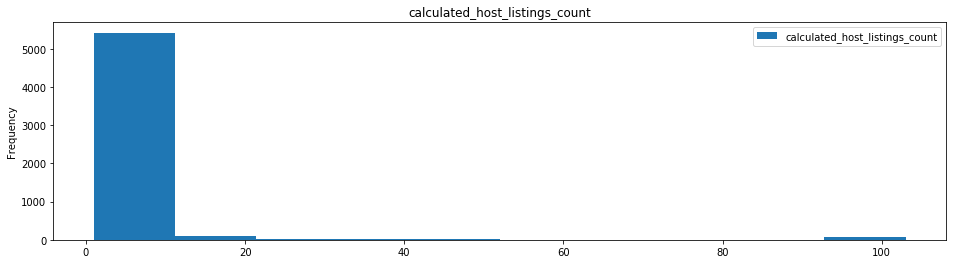

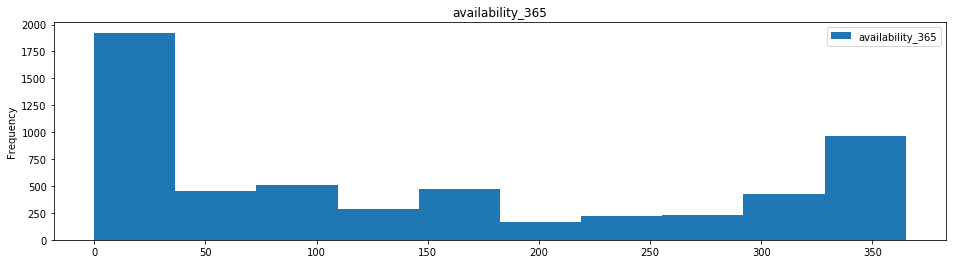

In [181]:
for cname in analysis_variables:
    plt.figure()
    data[cname].plot.hist(figsize=(16,4), legend=True);
    plt.legend(ncol = 3)
    plt.title(cname)

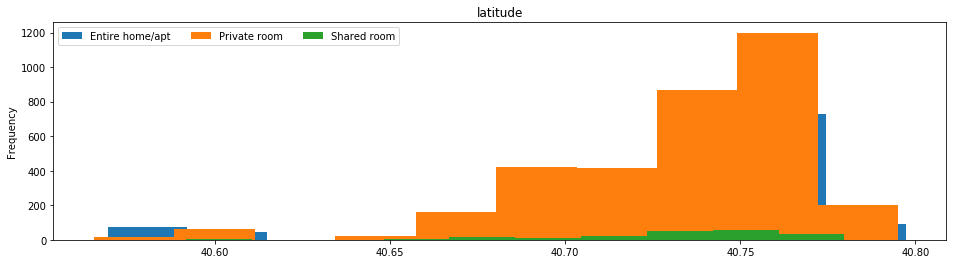

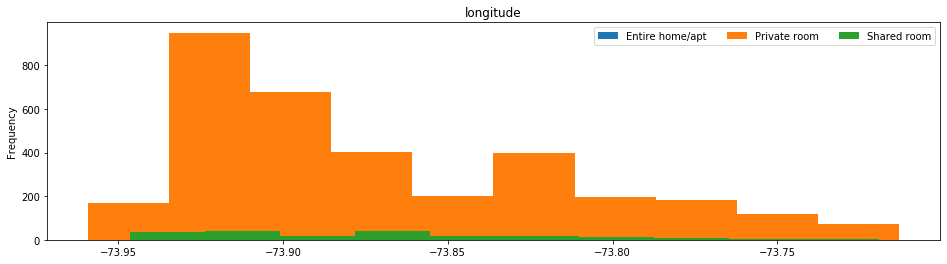

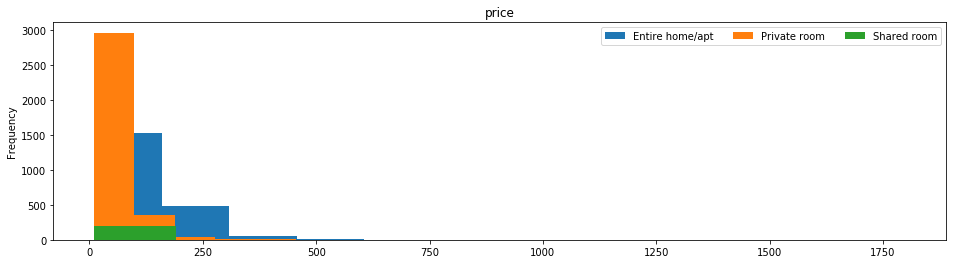

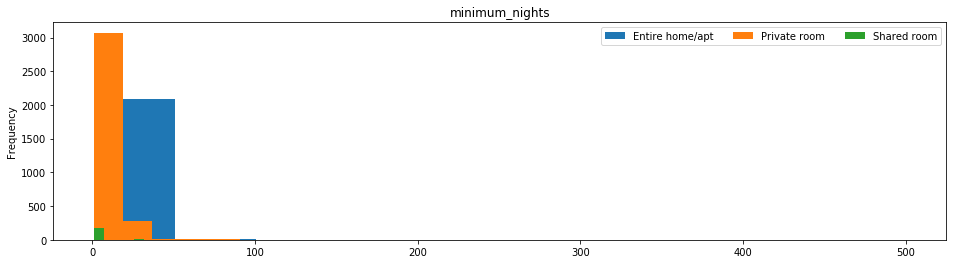

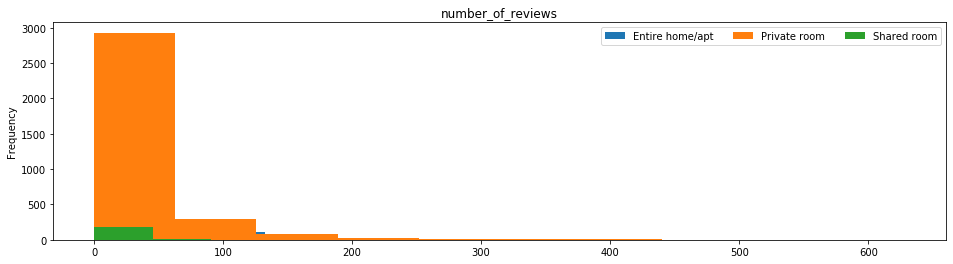

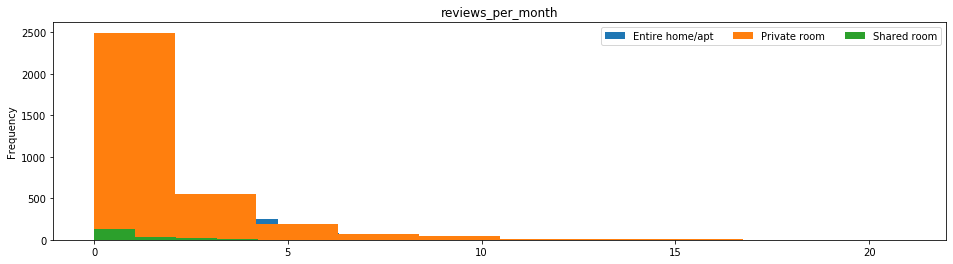

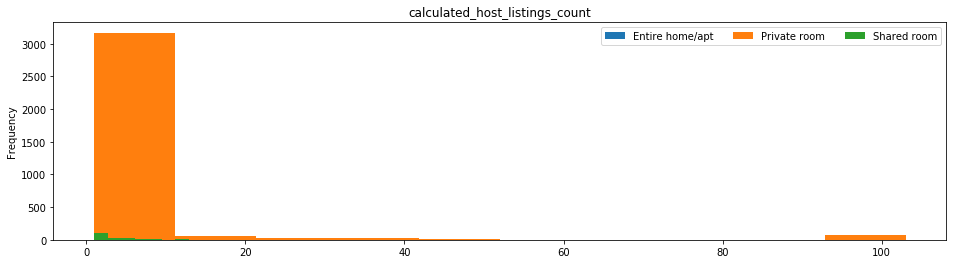

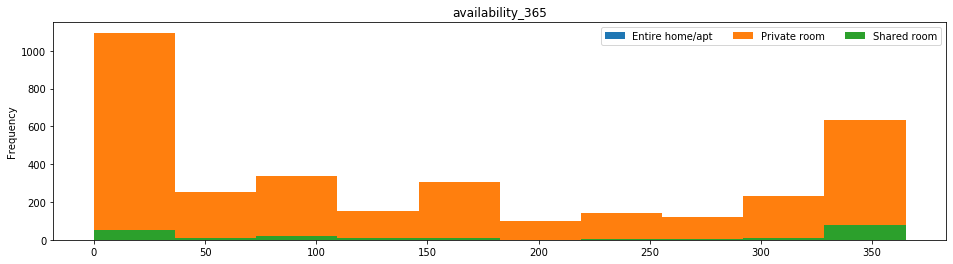

In [175]:
for cname in analysis_variables:
    plt.figure()
    data.groupby('room_type')[cname].plot.hist(figsize=(16,4), legend=True);
    plt.legend(ncol = 3)
    plt.title(cname)

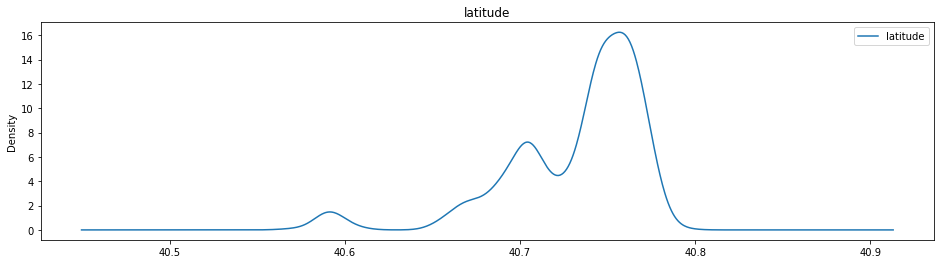

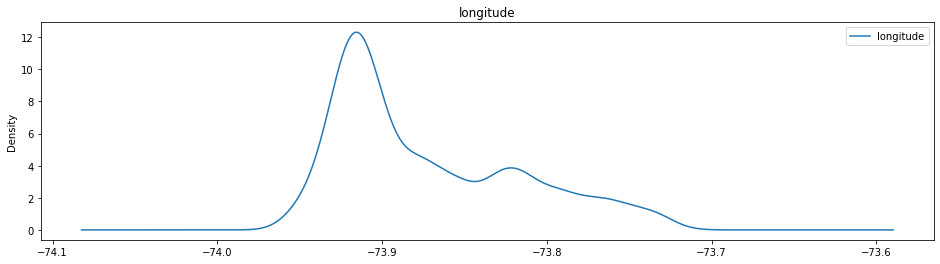

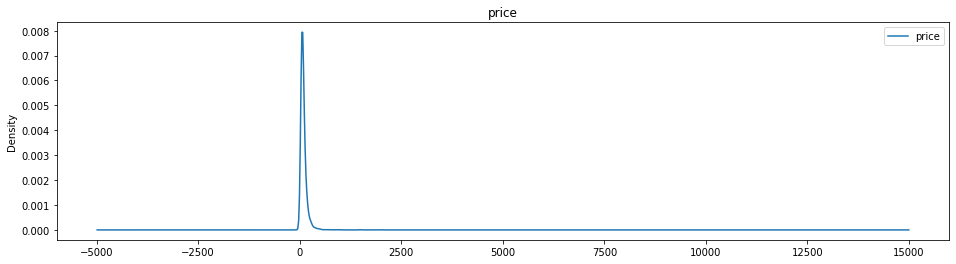

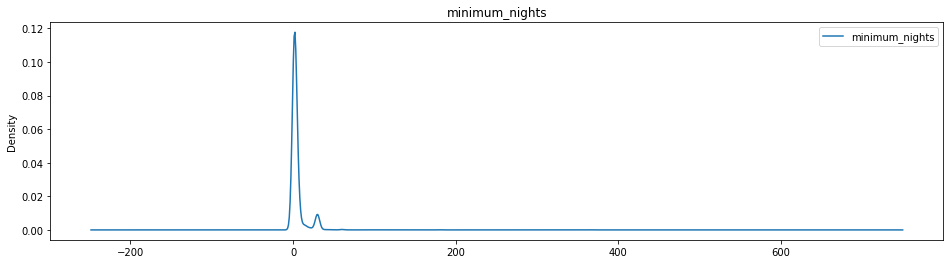

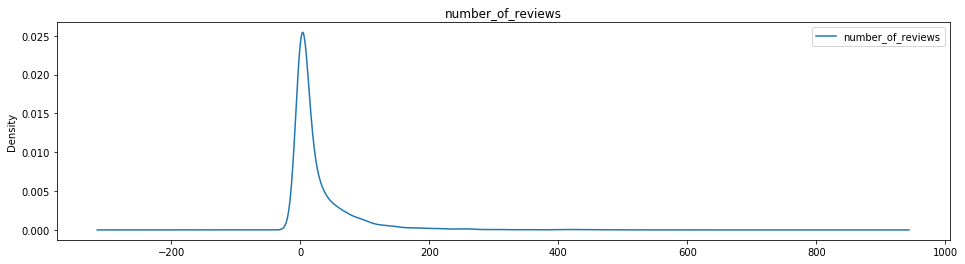

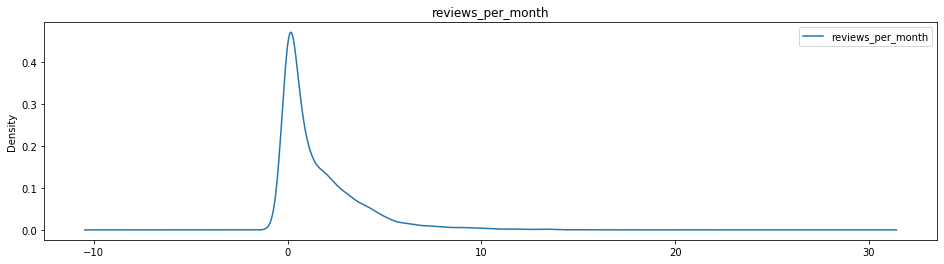

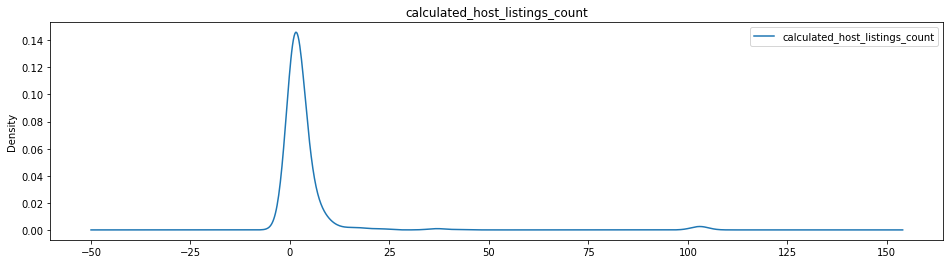

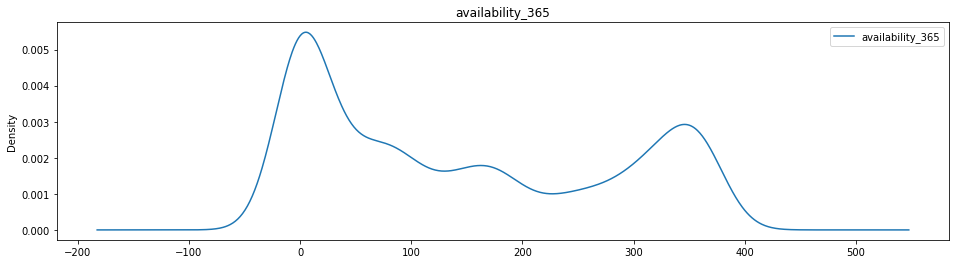

In [190]:
for cname in analysis_variables:
    plt.figure()
    data[cname].plot.kde(figsize=(16,4), legend=True)
    plt.title(cname)

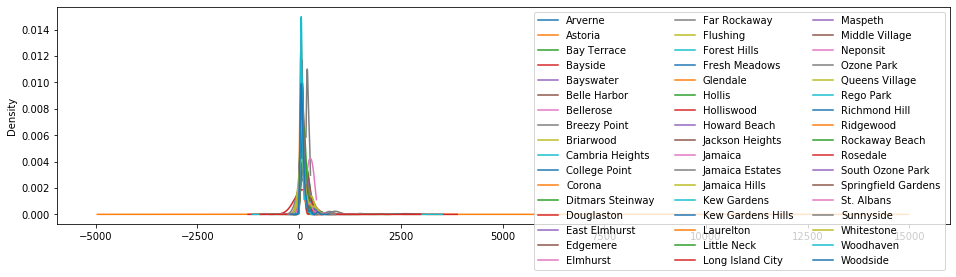

In [191]:
idx = data.price.abs() <= 1000
#df_airbnb[idx].price.plot.kde(figsize=(4,4), legend=True)

data.groupby('neighbourhood').price.plot.kde(figsize=(16,4), legend=True);
plt.legend(ncol = 3)

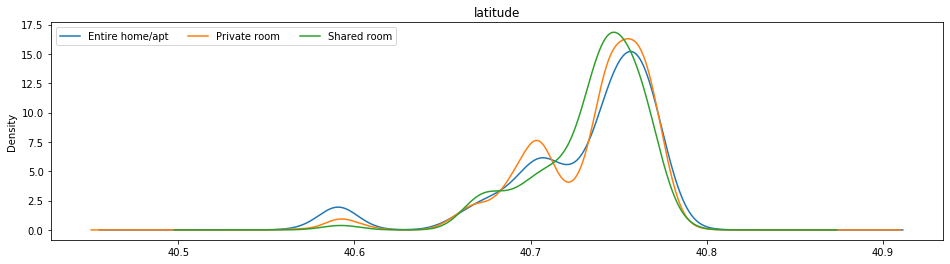

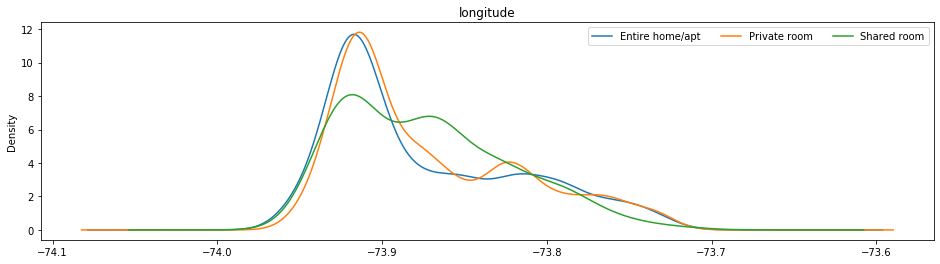

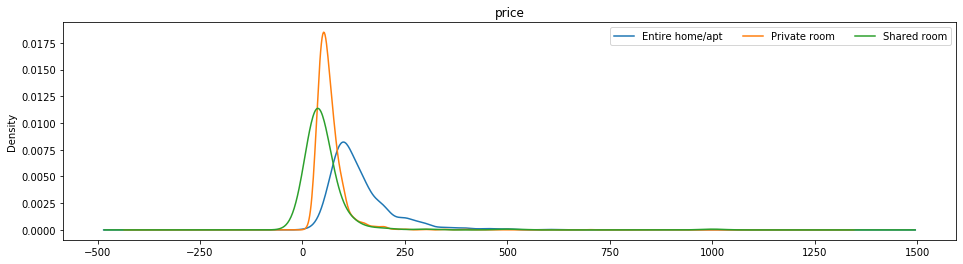

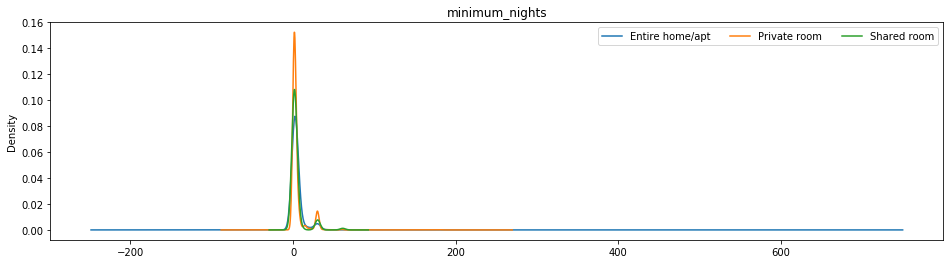

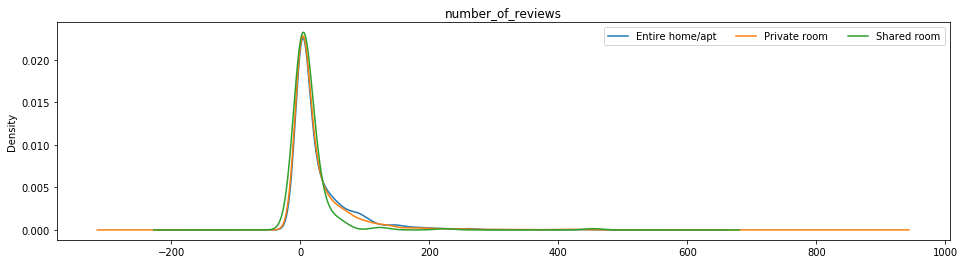

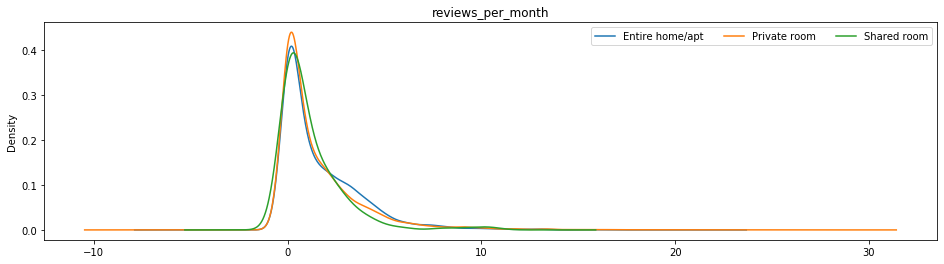

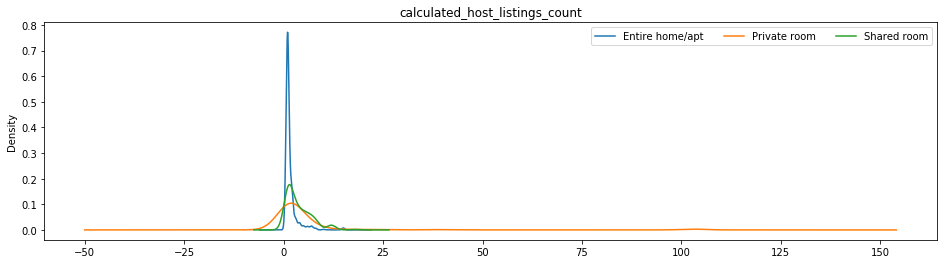

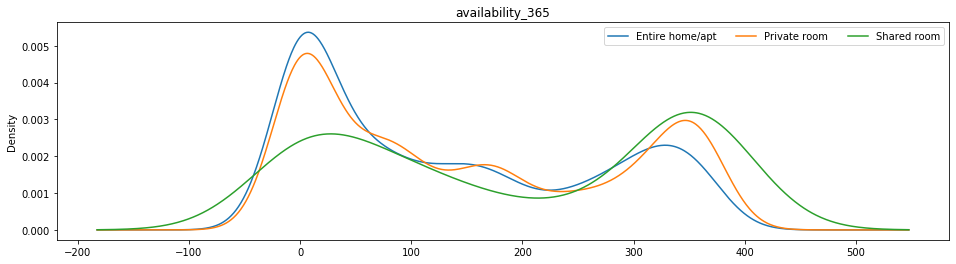

In [191]:
for cname in analysis_variables:
    plt.figure()
    data.groupby('room_type')[cname].plot.kde(figsize=(16,4), legend=True);
    plt.legend(ncol = 3)
    plt.title(cname)

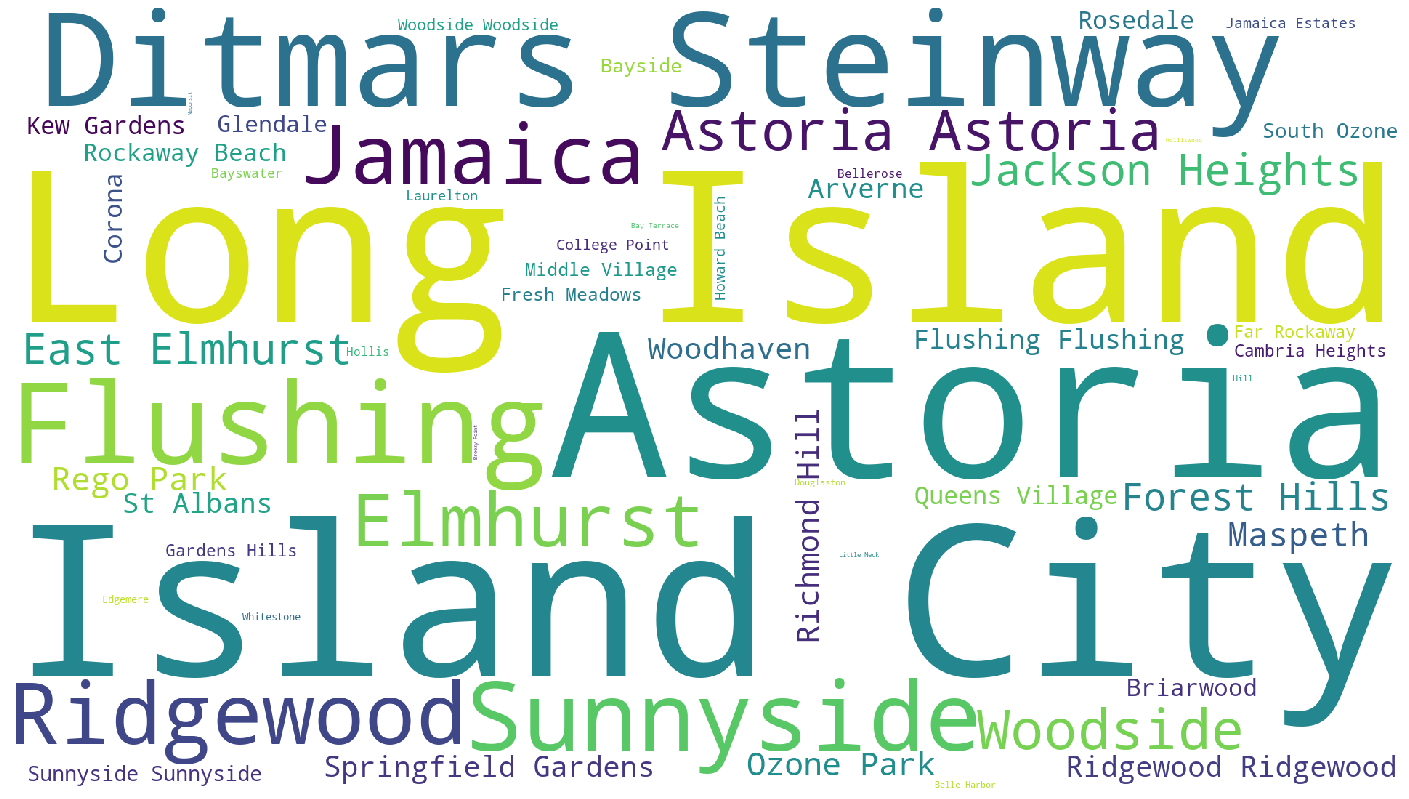

In [183]:
from wordcloud import WordCloud
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(data.neighbourhood))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('neighbourhood.png')
plt.show()

In [192]:
data.corr()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
id,1.00e+00,6.21e-01,-0.10,1.26e-01,4.45e-03,-0.03,-0.33,0.14,0.13,0.02
host_id,6.21e-01,1.00e+00,-0.12,2.13e-01,-6.28e-03,-0.06,-0.15,0.19,0.08,0.12
latitude,-1.01e-01,-1.21e-01,1.00,-5.73e-01,-5.03e-02,0.04,-0.01,-0.07,0.02,-0.13
longitude,1.26e-01,2.13e-01,-0.57,1.00e+00,-4.18e-03,-0.11,0.09,0.20,-0.04,0.20
price,4.45e-03,-6.28e-03,-0.05,-4.18e-03,1.00e+00,-0.05,-0.06,-0.07,-0.11,0.08
minimum_nights,-2.82e-02,-5.56e-02,0.04,-1.08e-01,-4.93e-02,1.00,-0.09,-0.15,0.27,0.03
number_of_reviews,-3.33e-01,-1.53e-01,-0.01,9.01e-02,-6.16e-02,-0.09,1.00,0.63,-0.06,0.16
reviews_per_month,1.39e-01,1.92e-01,-0.07,1.98e-01,-7.32e-02,-0.15,0.63,1.00,-0.07,0.14
calculated_host_listings_count,1.26e-01,7.68e-02,0.02,-4.11e-02,-1.15e-01,0.27,-0.06,-0.07,1.00,0.09
availability_365,2.12e-02,1.22e-01,-0.13,1.96e-01,8.05e-02,0.03,0.16,0.14,0.09,1.00


Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

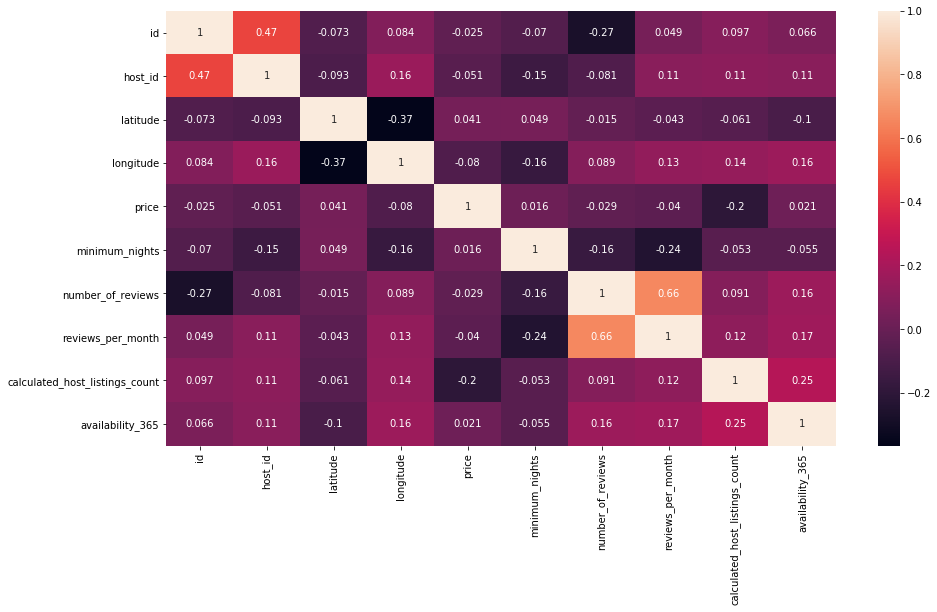

In [193]:
corr = data.corr(method='kendall')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)
data.columns

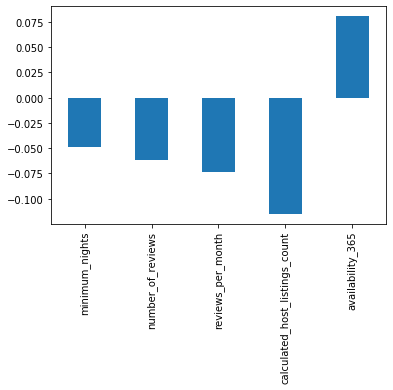

In [194]:
data.corr()['price'].drop(['price','id','host_id','latitude','longitude']).plot.bar()

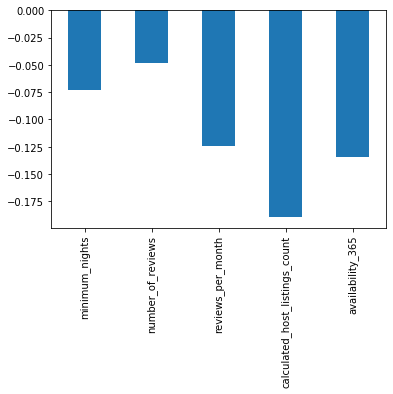

In [195]:
idx = data.room_type == 'Shared room'

data[idx].corr()['price'].drop(['price','id','host_id','latitude','longitude']).plot.bar()

Text(0, 0.5, '$')

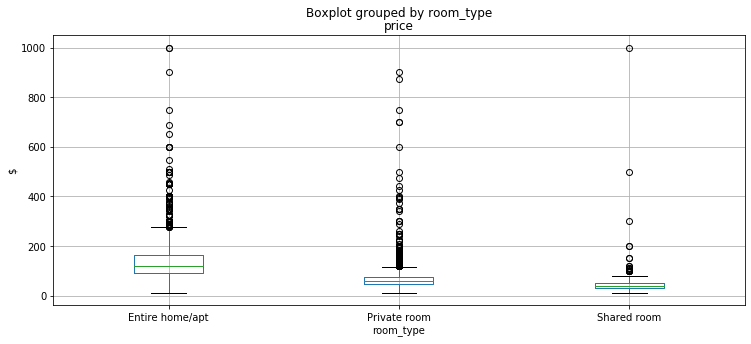

In [196]:
data.boxplot('price', 'room_type', figsize=(12,5))
plt.ylabel('$')

Text(0, 0.5, '$')

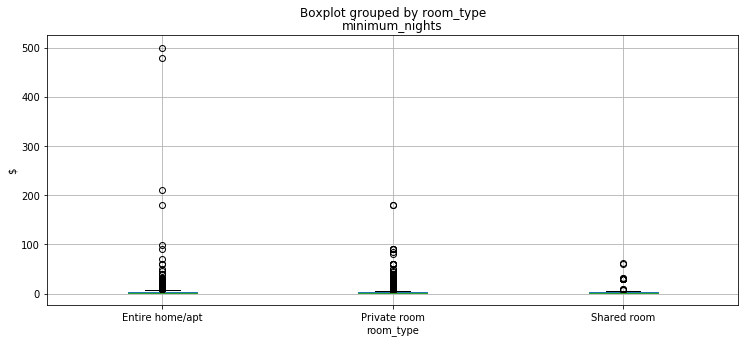

In [198]:
data.boxplot('minimum_nights', 'room_type', figsize=(12,5))
plt.ylabel('$')

Text(0, 0.5, '$')

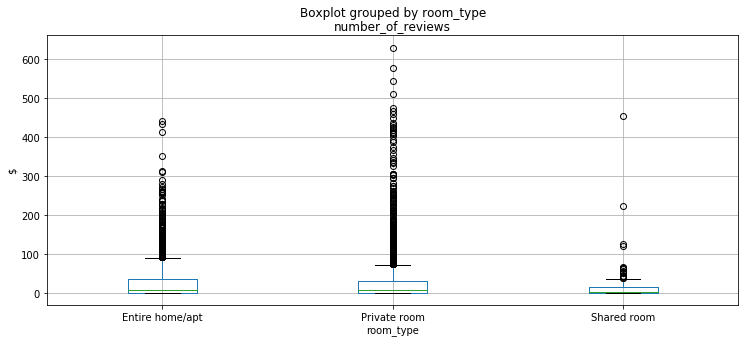

In [199]:
data.boxplot('number_of_reviews', 'room_type', figsize=(12,5))
plt.ylabel('$')

Text(0, 0.5, '$')

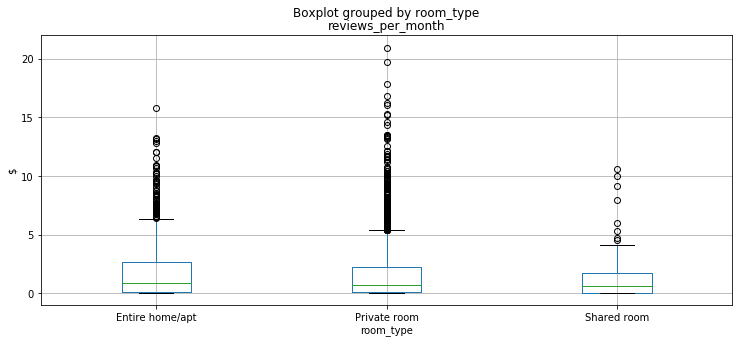

In [200]:
data.boxplot('reviews_per_month', 'room_type', figsize=(12,5))
plt.ylabel('$')

Text(0, 0.5, '$')

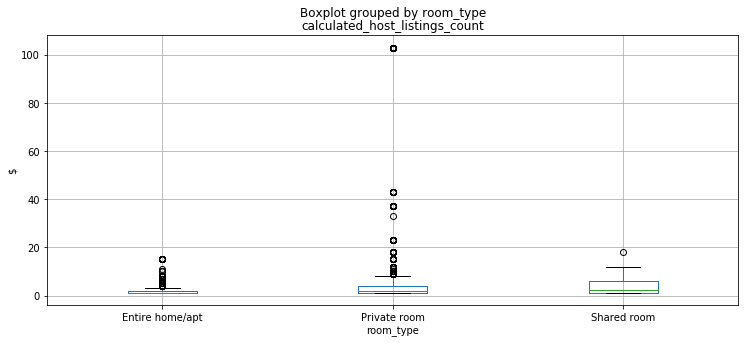

In [201]:
data.boxplot('calculated_host_listings_count', 'room_type', figsize=(12,5))
plt.ylabel('$')

Text(0, 0.5, '$')

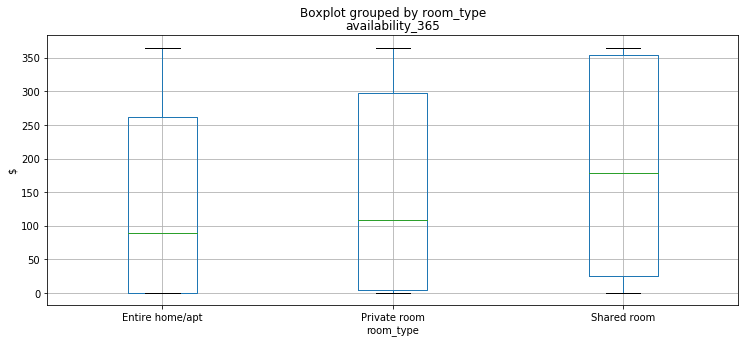

In [202]:
data.boxplot('availability_365', 'room_type', figsize=(12,5))
plt.ylabel('$')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002035F07D348>,
      dtype=object)

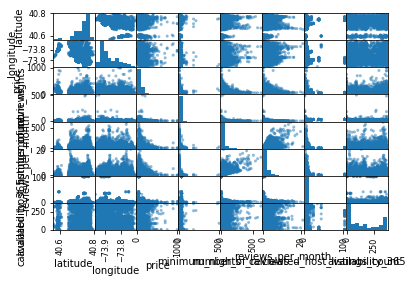

In [204]:
pd.plotting.scatter_matrix(data[analysis_variables])

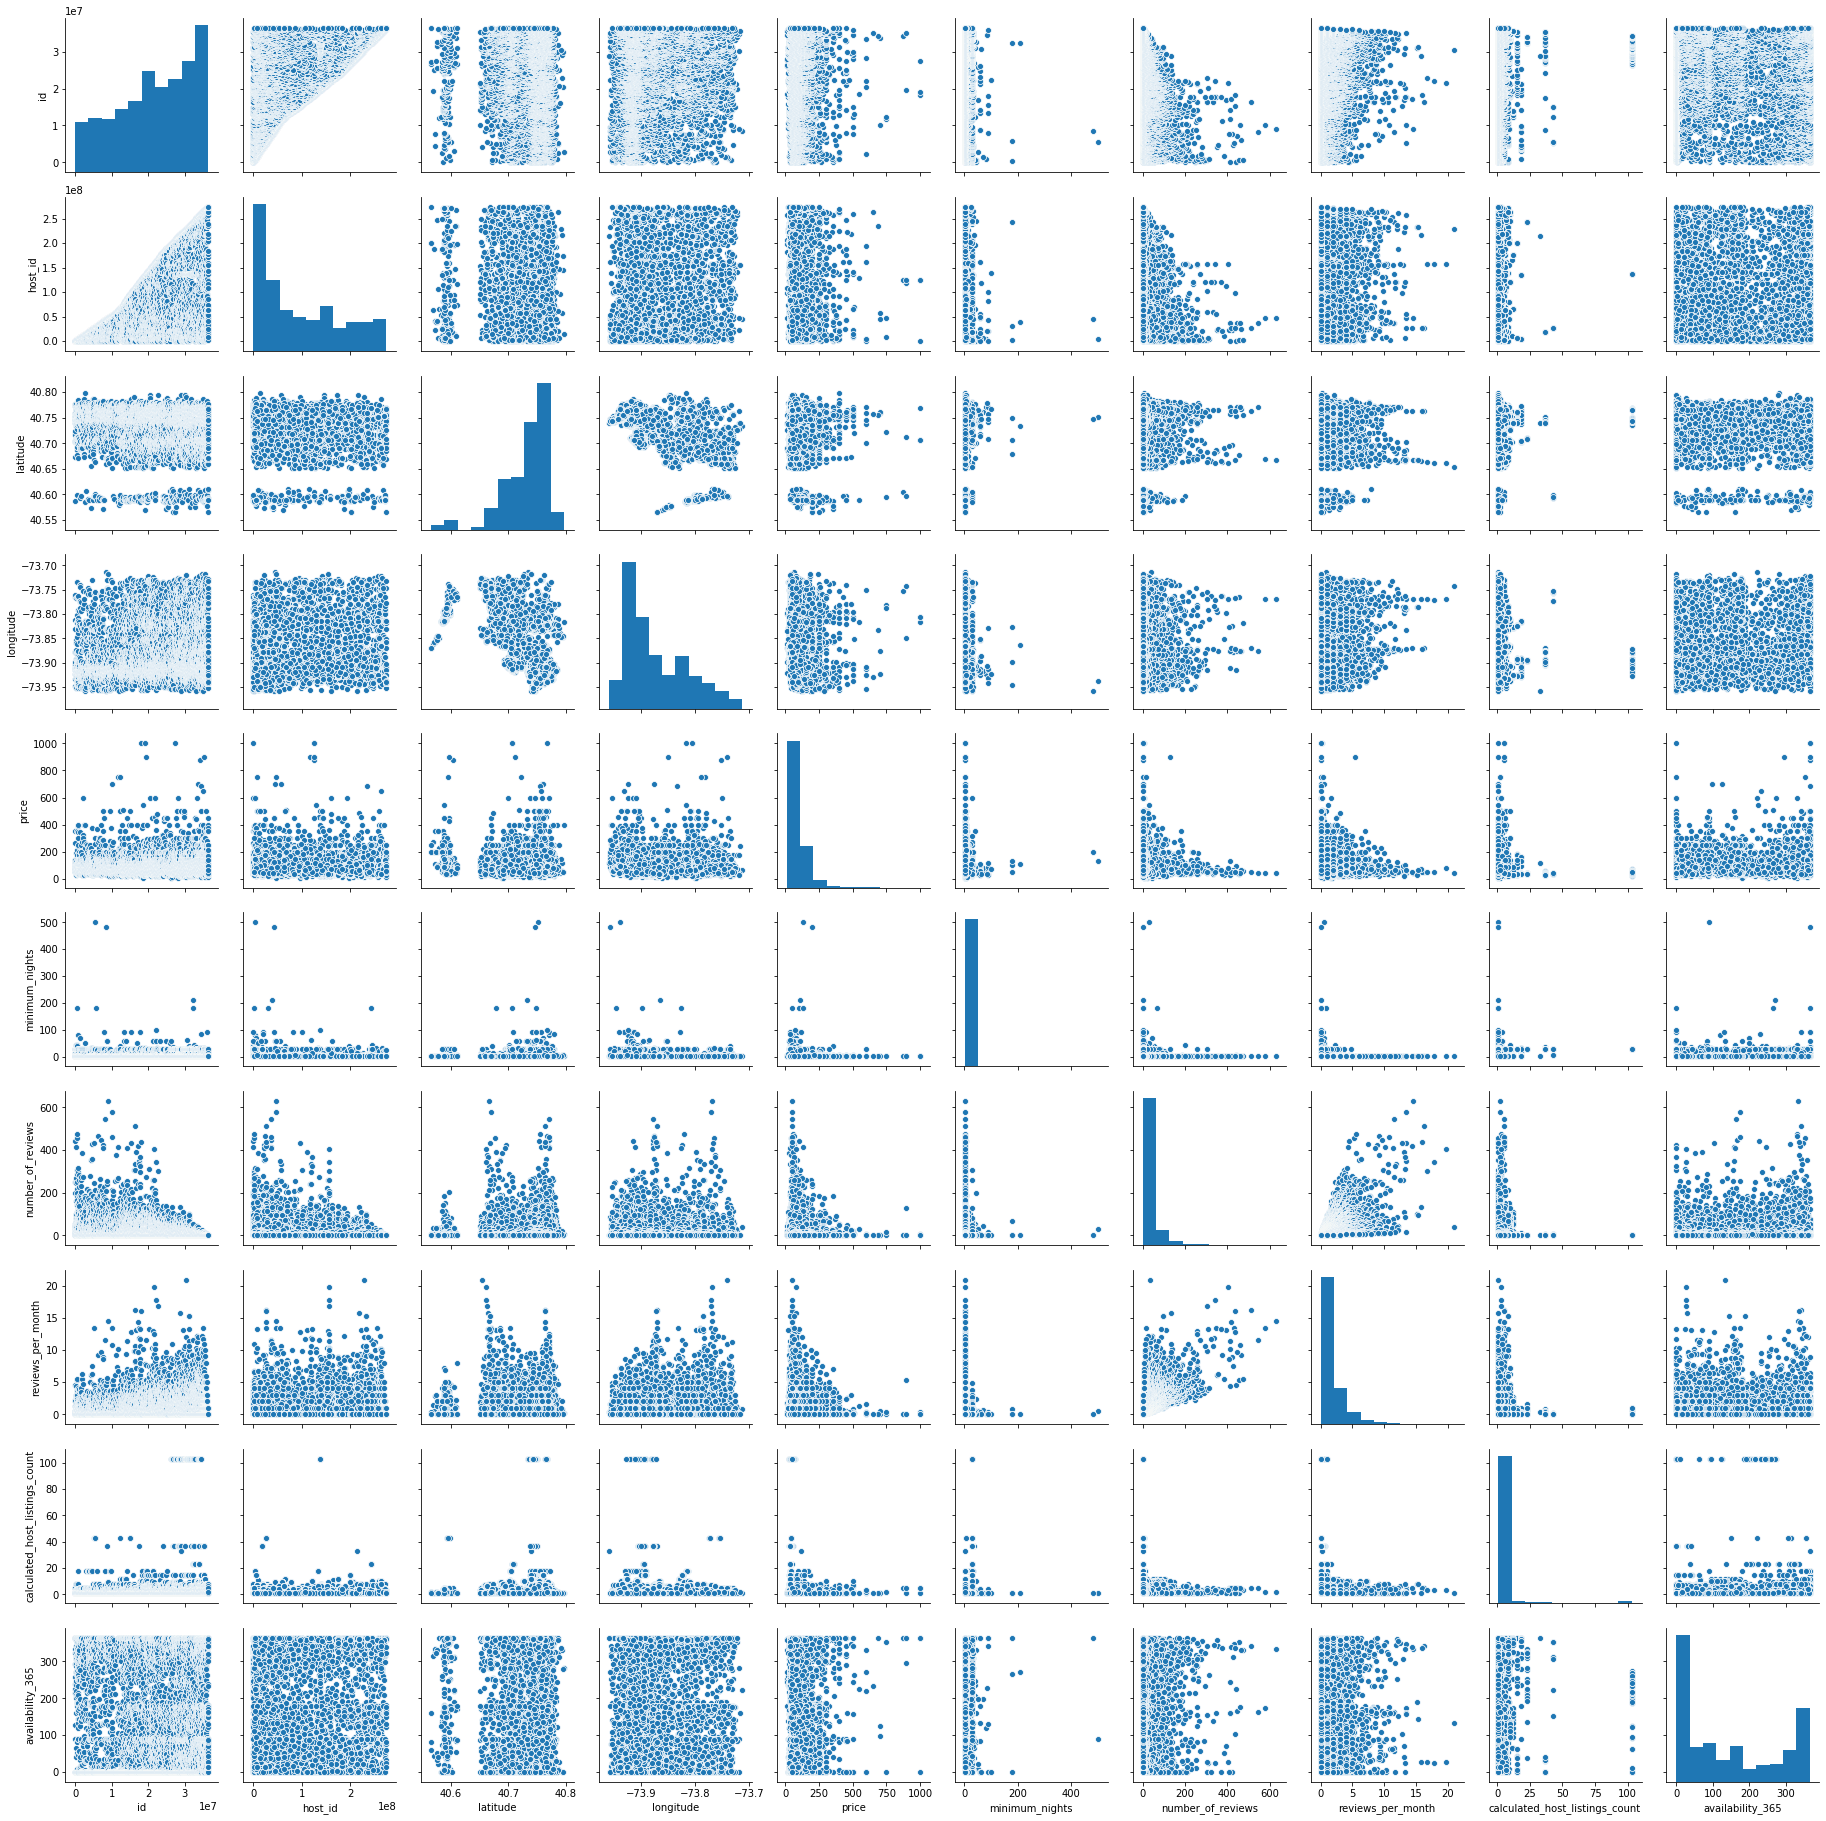

In [205]:
sns.pairplot(data)


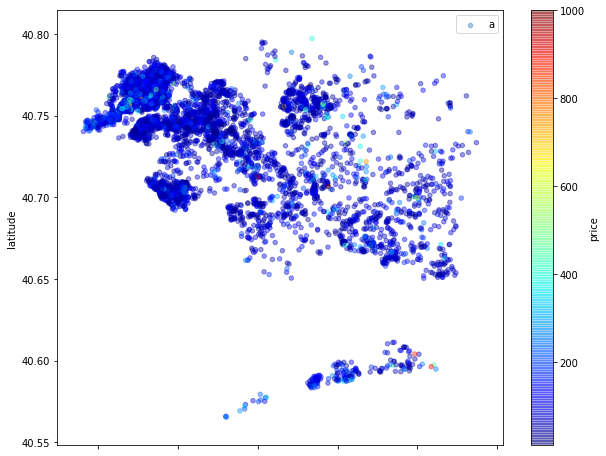

In [206]:
#let's what we can do with our given longtitude and latitude columns

#let's see how scatterplot will come out 
viz_4=data.plot(kind='scatter', x='longitude', y='latitude', label='a', c='price',cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, figsize=(10,8))
viz_4.legend()

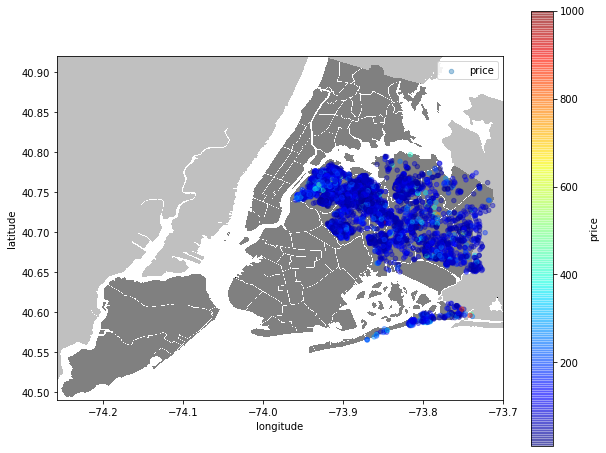

In [207]:
import urllib
#initializing the figure size
plt.figure(figsize=(10,8))
#loading the png NYC image found on Google and saving to my local folder along with the project
i=urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/e/ec/Neighbourhoods_New_York_City_Map.PNG')
nyc_img=plt.imread(i)
#scaling the image based on the latitude and longitude max and mins for proper output
plt.imshow(nyc_img,zorder=0,extent=[-74.258, -73.7, 40.49,40.92])
ax=plt.gca()
#using scatterplot again
data.plot(kind='scatter', x='longitude', y='latitude', label='price', c='price', ax=ax, 
           cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, zorder=5)
plt.legend()
plt.show()

<BarContainer object of 10 artists>

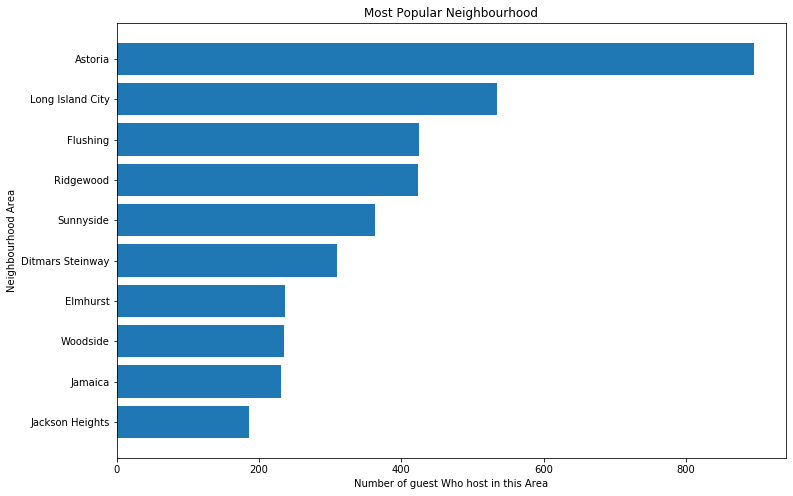

In [208]:
valuecount = data.neighbourhood.value_counts()[:10]
plt.figure(figsize=(12, 8))
x = list(valuecount.index)
y = list(valuecount.values)
x.reverse()
y.reverse()

plt.title("Most Popular Neighbourhood")
plt.ylabel("Neighbourhood Area")
plt.xlabel("Number of guest Who host in this Area")

plt.barh(x, y)

In [48]:
# Filtering Variables 

In [209]:

data = data[analysis_variables + target_variable].copy()
n_classes = data[target_variable].nunique().values[0]

In [210]:
data.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,room_type
0,40.75,-73.95,130.0,3.0,248.0,2.25,1.0,215.0,Private room
1,40.75,-73.90,70.0,30.0,25.0,0.22,1.0,324.0,Private room
2,40.74,-73.83,140.0,2.0,1.0,0.01,1.0,1.0,Private room
3,40.75,-73.92,79.0,30.0,28.0,0.26,1.0,126.0,Private room
4,40.70,-73.90,350.0,8.0,10.0,0.11,5.0,365.0,Entire home/apt


In [49]:
# Normalização de dados 


In [ ]:
## Standard Scaling

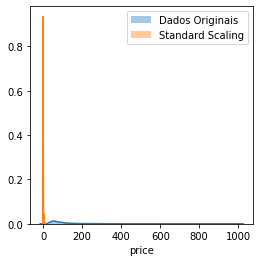

In [211]:
scaler = preprocessing.StandardScaler()
scaler.fit(data.drop(target_variable,axis=1))
std_normed_data = pd.DataFrame(scaler.transform(data.drop(target_variable,axis=1)), columns=data.drop(target_variable,axis=1).columns)

# Plot distributions
plt.figure(figsize=(4,4))
sns.distplot(data[test_var], label='Dados Originais', )
sns.distplot(std_normed_data[test_var], label='Standard Scaling')
plt.legend()

In [212]:
std_normed_data.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,0.40,-1.31,0.47,-0.15,4.24e+00,0.32,-0.25,0.52
1,0.47,-0.54,-0.34,1.87,-5.28e-02,-0.63,-0.25,1.33
2,0.22,0.72,0.60,-0.23,-5.15e-01,-0.73,-0.25,-1.06
3,0.35,-0.88,-0.21,1.87,4.86e-03,-0.61,-0.25,-0.14
4,-0.69,-0.44,3.42,0.22,-3.41e-01,-0.68,0.08,1.63


In [50]:
## Normalização por Min/Max 


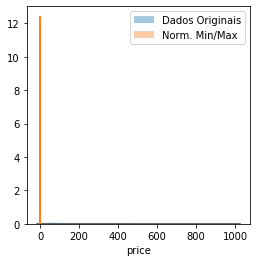

In [213]:
scaler = preprocessing.MinMaxScaler()
scaler.fit(data.drop(target_variable,axis=1))
minmax_normed_data = pd.DataFrame(scaler.transform(data.drop(target_variable,axis=1)), columns=data.drop(target_variable,axis=1).columns)

# Plot distributions
plt.figure(figsize=(4,4))
sns.distplot(data[test_var], label='Dados Originais', )
sns.distplot(minmax_normed_data[test_var], label='Norm. Min/Max')
plt.legend()

In [214]:
minmax_normed_data.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,0.79,0.05,0.12,4.01e-03,3.94e-01,1.07e-01,0.00,5.89e-01
1,0.80,0.23,0.06,5.81e-02,3.97e-02,1.05e-02,0.00,8.88e-01
2,0.75,0.52,0.13,2.00e-03,1.59e-03,4.78e-04,0.00,2.74e-03
3,0.78,0.15,0.07,5.81e-02,4.45e-02,1.24e-02,0.00,3.45e-01
4,0.60,0.25,0.34,1.40e-02,1.59e-02,5.25e-03,0.04,1.00e+00


In [54]:
## Normalização Logarítmica

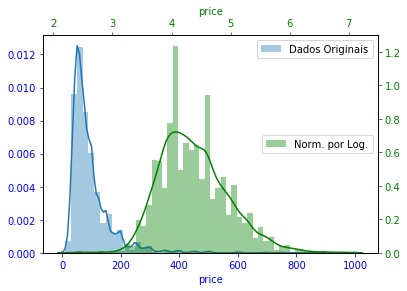

In [216]:
normed_data = data.copy()
normed_data[test_var] = np.log1p(data[test_var])

# Plot distributions
plt.figure(figsize=(6,4))
sns.distplot(data[test_var], label='Dados Originais', )
ax = plt.gca()
ax.xaxis.label.set_color('b')
ax.tick_params(axis='x', colors='b')
ax.tick_params(axis='y', colors='b')

ax2 = ax.twinx()
ax3 = ax2.twiny()
sns.distplot(normed_data[test_var],color='g', label='Norm. por Log.')
ax3.xaxis.label.set_color('g')
ax3.tick_params(axis='x', colors='g')
ax2.tick_params(axis='y', colors='g')
ax.legend()
ax3.legend(loc='center right')

In [56]:
# Estimativa de valor médio

In [ ]:
Qual é o Índice médio das diárias?

In [110]:
data.shape

(5666, 9)

In [217]:
n = 100
print('Valor médio: %.2f'%data[test_var].mean())
print('\t1)Preço médio amostral (',n,'): %.2f'%data.sample(n)[test_var].mean())
print('\t2)Preço médio amostral (',n,'): %.2f'%data.sample(n)[test_var].mean())
print('\t3)Preço médio amostral (',n,'): %.2f'%data.sample(n)[test_var].mean())

Valor médio: 95.01
	1)Preço médio amostral ( 100 ): 90.22
	2)Preço médio amostral ( 100 ): 89.06
	3)Preço médio amostral ( 100 ): 94.25


In [ ]:
Calculando a distribuição do valor médio da população para diversos sorteios de amostras. 

Valor médio da amostra  :  95.106799
Valor médio da população:  95.00830975954739
Erro padrão da amostra  :  5.155622031685313
Erro padrão estimado    :  5.269896876990348


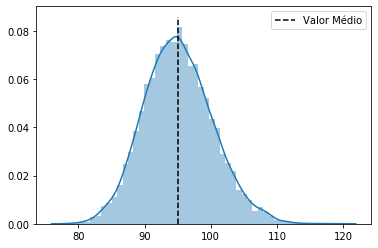

In [218]:
n_test = 10000
n = 200
mean_values = []
for i in range(n_test):
    mean_values.append(data.sample(n)[test_var].mean())
ref_mean_samples = np.array(mean_values)

print('Valor médio da amostra  : ', ref_mean_samples.mean())
print('Valor médio da população: ', data[test_var].mean())
print('Erro padrão da amostra  : ', ref_mean_samples.std())
print('Erro padrão estimado    : ', data[test_var].std() / np.sqrt(n))

# Plot
ax = sns.distplot(ref_mean_samples)
ax.plot([data[test_var].mean(), data[test_var].mean()], ax.axis()[2:],
        '--k', label='Valor Médio')
ax.legend()


In [ ]:
Visualizando o impacto do tamanho da amostra para a estimativa do valor médio.

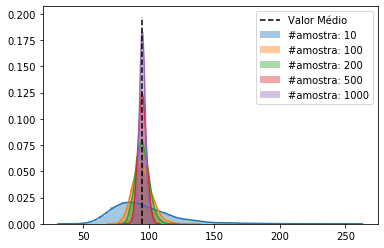

In [219]:
n_test = 10000

for ntrial in [10, 100, 200, 500, 1000]:
    mean_values = []
    for i in range(n_test):
        mean_values.append(data.sample(ntrial)[test_var].mean())
    # Plot
    ax = sns.distplot(mean_values, label='#amostra: %i'%ntrial)
ax.plot([data[test_var].mean(), data[test_var].mean()], ax.axis()[2:],
        '--k', label='Valor Médio')
ax.legend()



In [ ]:
Visualizando o impacto da quantidade de testes para a estimativa do valor médio da população. 

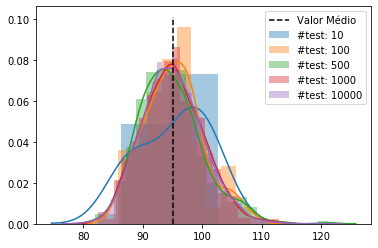

In [220]:
ntrial = 200
for n_test in [10, 100, 500, 1000, 10000]:
    mean_values = []
    for i in range(n_test):
        mean_values.append(data.sample(ntrial)[test_var].mean())
    # Plot
    ax = sns.distplot(mean_values, label='#test: %i'%n_test)
ax.plot([data[test_var].mean(), data[test_var].mean()], ax.axis()[2:],
        '--k', label='Valor Médio')
ax.legend()


In [63]:
# Bootstraping

In [ ]:
Método de estimativa de parâmetros de uma população por bootstrapping.

In [221]:
def meanBootstrap(X, n_trials):
    mean_estimates = []
    for i in range (n_trials):
        sample = [X[j] for j in np.random.randint(len(X), size=len(X))]
    mean_estimates.append(np.mean(sample))
    return mean_estimates

m = meanBootstrap(data[test_var].values, 10000)
print("Valor médio população     :", data[test_var].mean())
print("Estimativa amostral (200) :", data.sample(200)[test_var].mean())
print("Estimativa bootstrap      :", np.mean(m))

Valor médio população     : 95.00830975954739
Estimativa amostral (200) : 94.315
Estimativa bootstrap      : 94.86474540311174


In [65]:
# Intervalo de Confiança 


In [ ]:
Estimativa do intervalo de confiança por aproximação Normal.

Valor médio população :  95.00830975954739
Média amostral        :  95.106799
Intervalo de confiança:  (93.06600002995849, 96.95061948913629)


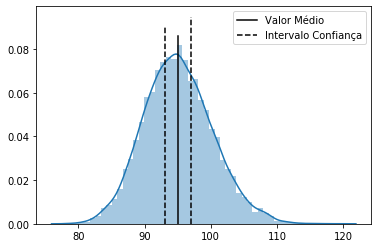

In [222]:
mean_val = data[test_var].mean()
standard_error = data[test_var].std() / np.sqrt(data.shape[0])
ci = (mean_val - standard_error*1.96, mean_val + standard_error*1.96)
print('Valor médio população : ', mean_val)
print('Média amostral        : ', ref_mean_samples.mean())
print('Intervalo de confiança: ', ci)

ax = sns.distplot(ref_mean_samples)
ax.plot([mean_val, mean_val], ax.axis()[2:], '-k', label='Valor Médio')
ax.plot([ci[0], ci[0]], ax.axis()[2:], '--k', label='Intervalo Confiança')
ax.plot([ci[1], ci[1]], ax.axis()[2:], '--k',)
ax.legend()

In [67]:
# Teste de Hipóteses 

In [68]:
## Por Intervalo de Confiança 

Número de sorteios fora do I.C.   :  13 em 200
Proporção de sorteios fora do I.C.: 6.5 %


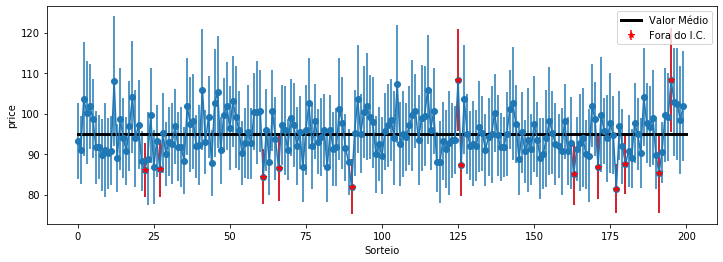

In [224]:
n_test = 200
ntrial = 200

mean_values = []
conf_values = []
for i in range(n_test):
    data_sample = data.sample(ntrial)[test_var]
    mean_values.append(data_sample.mean())
    standard_error = data_sample.std() / np.sqrt(ntrial)
    conf_values.append([standard_error*1.96, standard_error*1.96])

mean_values = np.array(mean_values)
conf_values = np.array(conf_values).T 
idx = ((data[test_var].mean() < (mean_values - conf_values[0])) |
       (data[test_var].mean() > (mean_values + conf_values[1])))
x_trials = np.arange(n_test)

print('Número de sorteios fora do I.C.   : ', idx.sum(), 'em', idx.shape[0])
print('Proporção de sorteios fora do I.C.: %.1f'%(idx.sum()/idx.shape[0] * 100),'%')

# Plot
plt.figure(figsize=(12,4))
plt.errorbar(x_trials, mean_values, yerr=conf_values, marker='o')
plt.errorbar(x_trials[idx], mean_values[idx], yerr=conf_values[:, idx],
             marker='*',color='r', linestyle='', label='Fora do I.C.')
plt.plot([0, n_test], [data[test_var].mean(), data[test_var].mean()],
        '-k',lw=3, label='Valor Médio')
plt.xlabel('Sorteio')
plt.ylabel(test_var)
plt.legend()

In [ ]:
Hipotese HA: Apartamentos caros e baratos se Comportam Diferente sob a Variável Testada 

Classe Notas Altas : 87.9140
Classe Notas Baixas: 103.3077
	I.C.: de 97.6284  a 108.9869


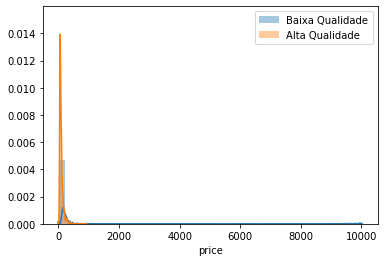

In [157]:
if n_classes == 3:
    class_lo = data[data['number_of_reviews'] <= 32].copy()
    class_up = data[data['number_of_reviews']  > 32].copy()

    class_lo_mean = class_lo[test_var].mean()
    class_lo_ci   = class_lo[test_var].std()/np.sqrt(class_lo.shape[0]) * 1.96


    print('Classe Notas Altas : %.4f'%class_up[test_var].mean())
    print('Classe Notas Baixas: %.4f'%class_lo_mean)
    print('\tI.C.: de %.4f'%(class_lo_mean - class_lo_ci), ' a %.4f'%(class_lo_mean + class_lo_ci))

    sns.distplot(class_lo[test_var], label='Baixa Qualidade')
    sns.distplot(class_up[test_var], label='Alta Qualidade')
    plt.legend()

In [ ]:
## Por p-valor

In [ ]:
Qual é a probabilidade de que a diferença no preço seja por sorte?

In [225]:
if n_classes==3:
    test_var_lo = class_lo[test_var].values
    test_var_up = class_up[test_var].values
    mean_diff = np.abs(test_var_up.mean() - test_var_lo.mean())

    # pooling distributions
    pool = np.concatenate([test_var_up, test_var_lo])
    np.random.shuffle(pool)

    #sample generation

    N = 10000 # number of samples
    n = np.min([test_var_up.shape[0], test_var_lo.shape[0]])
    diff = [0]*N
    for i in range(N):
        p1 = [np.random.choice(pool) for _ in range(n)]
        p2 = [np.random.choice(pool) for _ in range(n)]
        diff[i] = np.abs(np.mean(p1) - np.mean(p2))


    # counting differences larger than the observed one
    diff2 = np.array(diff)
    w1 = np.where(diff2 > mean_diff)[0]

    p_value = len(w1)/float(N)

    print('Simulação do p-valor: ', p_value)
    print('Diferença: ', mean_diff)

    if p_value < 0.05:
        print('O efeito observado é provável')
    else:
        print('O efeito é improvável')    

Simulação do p-valor:  0.024
Diferença:  15.393677791960286
O efeito observado é provável


In [70]:
# Regressão Logística 

In [146]:
data.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,room_type
0,40.75,-73.95,130.0,3.0,248.0,2.25,1.0,215.0,Private room
1,40.75,-73.90,70.0,30.0,25.0,0.22,1.0,324.0,Private room
2,40.74,-73.83,140.0,2.0,1.0,0.01,1.0,1.0,Private room
3,40.75,-73.92,79.0,30.0,28.0,0.26,1.0,126.0,Private room
4,40.70,-73.90,350.0,8.0,10.0,0.11,5.0,365.0,Entire home/apt


In [150]:
import sklearn.linear_model as lm

classifier_variables = ['price', 'minimum_nights']
target_variable = ['room_type']

n_classes = data[target_variable].nunique().values[0]

x_data = data[classifier_variables].copy().values
y_data = data[target_variable].copy().values
if n_classes == 3:
    y_data[y_data <= 5] = 0
    y_data[y_data  > 5] = 1


cat_encoder = preprocessing.OrdinalEncoder()
cat_encoder.fit(y_data)
y_data = cat_encoder.transform(y_data)
y_data = y_data.reshape(-1)


model = lm.LogisticRegression(solver='lbfgs')
model.fit(x_data, y_data)

if n_classes == 3:
    y_hat = model.predict_proba(x_data)[:,1]
else:
    y_hat = model.predict_proba(x_data)



In [ ]:
## Plot Distribution 

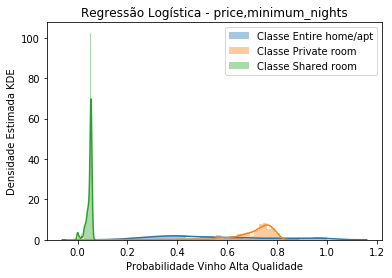

In [151]:
for i in range(n_classes):
    sns.distplot(y_hat[y_data == i, i], label='Classe '+cat_encoder.categories_[0][i])

plt.title('Regressão Logística - ' + ','.join(classifier_variables))
plt.ylabel('Densidade Estimada KDE')
plt.xlabel('Probabilidade Vinho Alta Qualidade')

plt.legend()

In [72]:
## Matriz de Confusão


In [156]:
from sklearn.metrics import confusion_matrix

if n_classes == 2:
    y_decision = y_hat > 0.5
else:
    y_decision = np.argmax(y_hat, axis=1)

col_names = ['Model ' + s for s in cat_encoder.categories_[0]]
idx_names = ['Real ' + s for s in cat_encoder.categories_[0]]

cmat = confusion_matrix(y_data, y_decision)
cmat = pd.DataFrame(cmat, index=idx_names,
                              columns=col_names)
cmat['Real Total'] = cmat.sum(axis=1)
cmat.loc['Model Total',:] = cmat.sum(axis=0)
cmat = cmat.astype(int)

cmat

,Model Entire home/apt,Model Private room,Model Shared room,Real Total
Real Entire home/apt,1115,981,0,2096
Real Private room,221,3151,0,3372
Real Shared room,11,187,0,198
Model Total,1347,4319,0,5666
